### P4-1 (AE Numérique 2) : 
# Simuler à l’aide d’un langage de programmation, la propagation d’une onde périodique.

### Rappel de cours :
Amplitude d'une onde progressive en fonction de la position et du temps :

y(x, t) = A * cos{ 2*Pi (t/T - x/lambda) }

$y(x, t) = A \times \cos\left( 2\pi \left(\dfrac{t}{T} - \dfrac{x}{\lambda}\right) \right)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
Pi = np.pi

# 1. Principe de base
Pour "visualiser" la propagation de l'onde, on propose de tracer plusieurs graphiques présentant **l'amplitude en fonction de la position** (comme dans l'activité précédente) **à des instants différents**. Ainsi la succession de graphiques donne une représentation de la propagation de l'onde dans le milieu matériel.

**TRAVAIL À FAIRE** : 
1. Ajouter la ligne de code permettant de claculer l'amplitude en fonction du temps et de la position.


**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- Lire et analyser quelques lignes de code commenté.
- Ajouter une ligne de code dans un programme pour traduire une formule physique.
- Connaître la syntaxe basique pour tracer un graphique (avec le module matpltlib.pyplot) :
            plt.plot(liste_abscisses, liste_ordonnees)
- Découvrir (et modifier si nécessaire) quelques paramètres de graphique (ex :  titre, légende, couleurs...).


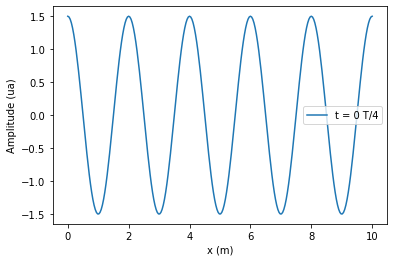

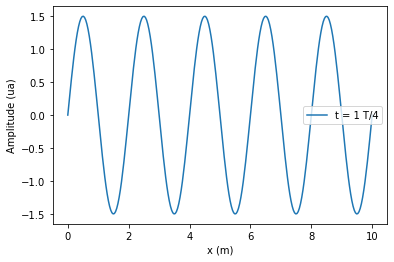

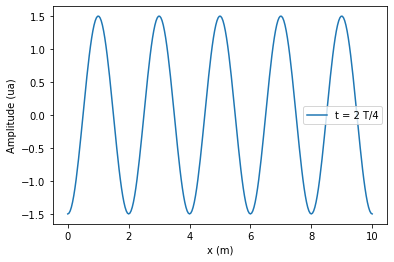

In [3]:
A = 1.5     # amplitude en ua
T = 3       # période en s
lambda_ = 2 # longueur d'onde en m

x = np.linspace(0, 5*lambda_, 256) # l'abscisse s'étend sur 5 longueurs d'onde

for k in range(3): # on trace 3 graphiques (à des instants différents)
    t = k * T/4    # on laisse un quart de période (T/4) entre 2 graphiques
    
    # À VOUS DE JOUER : compléter la ligne suivante avant de la décommenter
    # y = ...
    y = A*np.cos(2*Pi*(t/T - x/lambda_)) # calcul de l'amplitude de  l'onde
    
    plt.plot(x, y, label=f't = {k} T/4')
    
    plt.legend()
    plt.ylabel('Amplitude (ua)')
    plt.xlabel('x (m)')

    plt.show()

# 2. On ajoute des points de repère pour suivre la propagation de l'onde
Pour faciliter la visualisation de la propagation, on identifie sur les graphiques des points particuliers de perturbation que l'on suit au cours de la progation.


**TRAVAIL À FAIRE** : 
1. Exécuter la cellule et observer le résultat (ici on s'intéresse seulement à la physique !).

**ATTENTION** : les points colorés ne sont pas des points matériels qui se déplacent (il n'y a pas de transport de matière dans une onde) mais seulement des repères d'état de perturbation : c'est l'onde qui se propage.

*Si l'onde est une perturbation à la surface de l'eau par exemple, chaque point de l'eau ne fait que monter et descendre (aucun mouvement horizontal).*


**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- aucune ici : on fait de la physique (je me répète...).

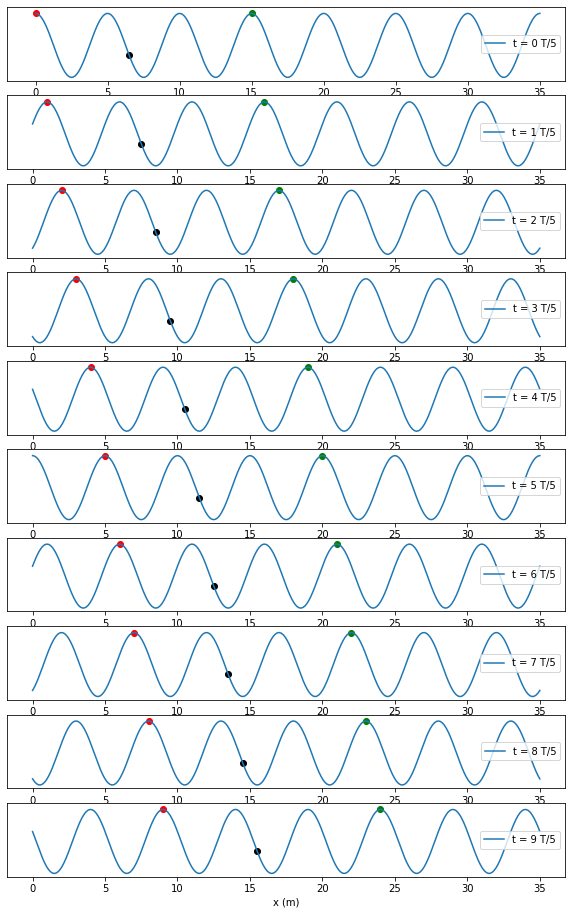

In [4]:
A = 1.5     # amplitude
lambda_ = 5 # longueur d'onde
T = 3       # période
nb_g = 10   # nb de graphiques à tracer
pas = 5     # fraction de période (1/pas) entre 2 graphiques (Delta_t = T/pas)

xmax = lambda_/pas*nb_g + 5*lambda_ # calcul de l'abscisse max pour voir toute la propagation
x = np.linspace(0, xmax, 256)       # étendue du graphique en abscisses

plt.figure(figsize=(10, 1.6*nb_g))  # permet de voir correctement tous les graphiques 
                                    # (1.6 inches vertical par graphe)

for k in range(nb_g): # on trace nb_g graphiques
    t = k * T / pas   # Delta_t = T/pas (durée entre 2 graphiques)

    y = A*np.cos(2*Pi*(t/T - x/lambda_))
    
    plt.subplot(nb_g, 1, k+1)
    plt.plot(x, y, label=f't = {k} T/{pas}')
    plt.legend(loc='right')
    
    plt.tick_params(axis='y',left=False, labelleft=False) # supprime l'axe y
    
    # la suite permet de repérer des points particuliers de l'onde pour mieux suivre sa propagation
    # on place un point rouge sur le 1er 'sommet'
    plt.scatter(k*lambda_/pas, A, color='red')
    # on place un point rouge sur le 4ème 'sommet' (décalage de 3 lambda au départ)
    plt.scatter(k*lambda_/pas+3*lambda_, A*math.cos(3*2*Pi), color='green')
    # on place un point noir sur un point quelconque (pour un décalage de delta * lambda au départ)
    delta = 1.3 # décalage arbitraire (1.3 * lambda)
    plt.scatter(k*lambda_/pas+delta*lambda_, A*math.cos(2*delta*Pi), color='black')
    
plt.xlabel('x (m)')
plt.show()

# 3. Visualisation avec l'outil d'animation de matplotlib
L'animation suivante permet de voir la propagation au cours du temps sur un seul graphique.

**TRAVAIL À FAIRE** : 
1. Modifier les paramètres de période ou longueur d'onde et observer le résultat (ici on s'intéresse seulement à la physique !).
2. On pourra aussi modifier éventuellement le pas entre 2 images de l'animation.


**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- Modifier des paramètres au sein d'un programme.

<IPython.core.display.Javascript object>


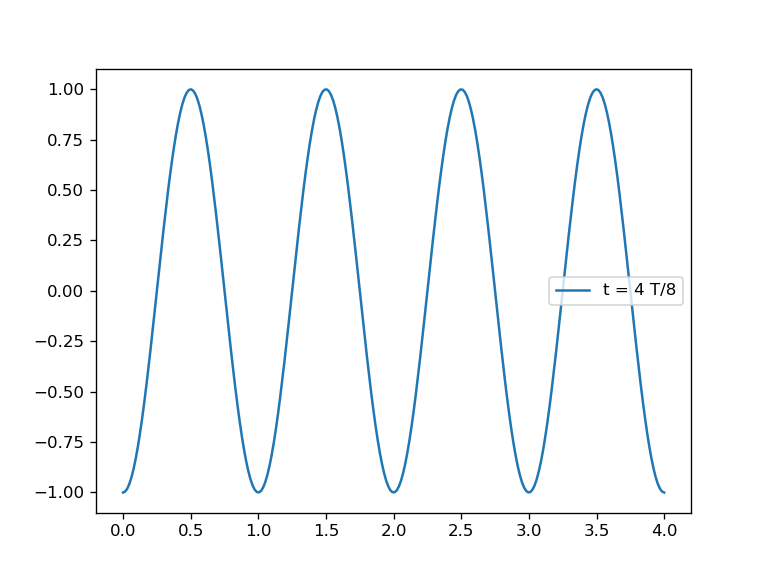

In [6]:
%matplotlib notebook

import matplotlib.animation as animation # librairie complémentaire pour l'animation

Pi = np.pi

T = 10    # période
L = 1     # longueur d'onde
pas = 8   # fraction de période entre 2 images (Delta_t = T / pas)

fig, ax = plt.subplots()

x = np.linspace(0, 4*L, 256) # 256 poitns sur 4 longueurs d'onde
line, = ax.plot(x, np.cos(2*Pi*(0/T - x/L))) # conserve une référence à la ligne tracée (Artist)

def animate(i):
    t = i * T/pas                             # à chaque image, on augmente le temps
    line.set_ydata(np.cos(2*Pi*(t/T - x/L)))  # maj des données
    line.set_label(f't = {i} T/{pas}')        # maj de la légende de la courbe
    plt.legend(loc='right')
    return line,

anim = animation.FuncAnimation(fig, animate, interval=250) # intervalle en ms entre 2 images

plt.show()

# 4. Une autre simulation, réalisée en p5js
https://profjahier.github.io/html/PC/onde_simulation.html